<a id='top'></a>

# Homework 2: Introduction to Probability and Simulation
***

**Name**: Kevin Ruby

***

This assignment is due on Canvas by **MIDNIGHT on Friday September 27**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | [Problem 5](#p5) 

---

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import random
%matplotlib inline

***
<a/ id='p1'></a>
[Back to top](#top)

### [20 points] Problem 1

To play a game, you have a bag containing 30 fair six-sided dice, with faces `{1,2,3,4,5,6}`.  <img style="float: right; width: 200px; padding: 3mm;" src="https://images-na.ssl-images-amazon.com/images/I/619NZnvxJaL._SX425_.jpg" alt="Drawing"/>
This bag also contains 17 fair eight-sided dice (faces `{1,2,3,4,5,6,7,8}`) and 3 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Six", "Eight" and "Twenty" (or S, E, and T, for short). In order to be sure that you are not distinguishing dice by their feel, you are required to wear crab claw gloves. After donning your gloves, you grab one die at random from the bag. 

Work the following problems by hand (or claw) unless otherwise stated (but don't be afraid to simulate to check your result!). 

**Part A**: You roll your die one time.  What is the probability of the event $R_7$, that you roll a 7?  Include at least 4 decimal places in your answer.

$(0*30/50) +(1/8 *17/50) +(1/20*3/50) = 0.0455$

**Part B**: Suppose you roll a 7.  What is the probability that the die you chose from the bag is an Eight-sided die? 

p(E|7) = $\frac{P(7|E) * P(E)}{P(7)}$ =
0.9341

**Part C:**  Are the events $R_7$ and $E$ independent?  Justify your answer **using math**.

No. $P(R_7|E) == 0.125 $  ,   $P(R_7) == 0.0455$ ,    $P(R_7|E) != P(R_7)$

We can see these values are not equal.

**Part D:**  Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 7 or 8 you know you did *not* pick a Six-sided die, and if you roll a 9 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3, 4, 5, or 6 you would have a stronger belief that you in fact grabbed one of the Six-sided dice.  Let $L_n$ be the event that you roll $n$ rolls of 1, 2, 3, 4, 5, or 6 in a row.  For example, one outcome in $L_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3, 4, 5, or 6, what is the probability that you have grabbed a Six-sided die?  That is, calculate **by hand** $P(S \mid L_1)$.

P(S|L) = $\frac{P(L_1|S)P(S)}{P(L_1)}$  = $\frac{1*\frac{30}{50}}{1*\frac{30}{50} + \frac{6}{8} *\frac{17}{50} + \frac{6}{20}* \frac{3}{50}}$ = 0.687

**Part E**:  

First, work out **by hand** a formula for the probability in general that you are rolling a Six-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3, 4, 5 or 6 (that is, $L_n$).  So you want a formula for $P(S \mid L_n)$ in terms of $n$.

Then, define a function `prob_six` to calculate $P(S \mid L_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D**.

$P(S|L_n)$ = $\frac{P(L_n|S)P(S)}{P(L_n)}$  = $\frac{1*\frac{30}{50}}{1*\frac{30}{50} + (\frac{6}{8})^n *\frac{17}{50} + (\frac{6}{20})^n* \frac{3}{50}}$

In [9]:
def prob_six(n):
    numerator = (1 * (30/50))
    denom = (1*30/50 + (6/8)**n *17/50 + (6/20)**n *3/50 )
    return (numerator/denom)
print (prob_six(1))



0.6872852233676976


**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3, 4, 5 or 6 that would make you believe that there's a better-than-95% chance that the die you grabbed is Six-sided?  Plugging larger and larger values for $n$ into your `prob_six` function is a very reasonable way to check this.

In [7]:
for i in range(0,15):
    print (i,prob_six(i))

0 0.6
1 0.6872852233676976
2 0.7531538316701186
3 0.8053069729517521
4 0.8473808781090273
5 0.8812780492557869
6 0.9083251148952147
7 0.929659421687253
8 0.9463090613586363
9 0.9591866491403235
10 0.9690752747517922
11 0.9766259989076987
12 0.9823665345003605
13 0.9867163649261432
14 0.990004085181827


we need 9 rolls to achieve at least 95%.

***
<a id='p2'></a>
[Back to top](#top)


### [20 points] Problem 2

Oscar and Stella are two octopuses who are very excited to have both secured professorships in the Computer Science department at CU. They work hard, but they also like to blow off a little steam after work. When they leave work from the CU Engineering Center ($E~$), they each head for one of five other locations: the Gym to get strong ($G~$), the Library to get learned ($L~$), the Boulder Reservoir to have a nice swim ($R$), the Hill to have a sandwich ($H~$), or to Brewing Market to have a nice Coffee ($C~$).  

Here are some rules governing their movements throughout the fair city of Boulder:
* When Oscar and/or Stella is leaving one location, they randomly select one of the available adjacent locations, with equal probability.
* This includes back-tracking. Eg. Stella could go from the Engineering Center to the Library, then directly back to the Engineering Center. 
* Assume that all moves require the same amount of time.
* They are also not allowed to stay put; they always must move to some *other* adjacent location.
* Oscar and Stella, being the think-for-yourselfers that they are, also act **independently** of one another. That is, the probability that Oscar goes from one place to another is independent of the probability of Stella's movements.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/chris_and_dan_statespace.png" style="width: 300px;"/>

**Part A**: Oscar is exhausted from a long day of researching whether [P=NP](https://en.wikipedia.org/wiki/P_versus_NP_problem) so, naturally, he wants to go to the brewing market to grab a coffee. That being said, Osacar has made a break through in his research and wants to follow up on it at the library, but he needs to run some errands too. Assume Oscar can do his errands at any location on the map. 

Compute by hand the probability that Oscar goes to the Brewing Market ($C$) in his first stop, makes a second stop at any location, then goes to the Library ($L$) third. 

- (1/4) * (1/3) * (1/3) = 1/36 (path 1)
- (1/4) * (1/3) * (1/4) = 1/48 (path 1)
- 1/36 + 1/48 = 0.0486

**Part B**: Stella is a competitive body-building octopus professor. This is quite the feat given her lack of bones!  Compute (by hand) the probability that Stella ends up at the Gym _either_ as her first _or_ second location visited after leaving the Engineering Center ($E$). (Again, assume that Stella wanders the streets of Boulder randomly using the same rules described above.)

- P(G|E) + P(L|E)*P(G|L) +P(R|E)*P(G|R)
- 1/4 + 1/16 + 1/8 = 0.4375

**Part C**: Suppose that Stella works late at the Engineering Center, while Oscar goes to the Gym.  Later, they both leave and wander around, randomly and independently of one another, as described above.
1. What is the probability that they run into each other in the same location on the first location visited?  
2. Given their two initial locations, what is the probability that they meet at the Hill after 2 moves?

1. - P(R|G)*P(R|E) + P(L|G)*P(L|E)
   - (1/4)*(1/4) +(1/4)*(1/4) = .125
   
   
 
2. OSCAR
- P(L|G) =1/4
- P(H|L) = 1/4
 - Stella
 - P(L|E)=1/4
 - P(H|L)=1/4
 - P(C|E)=1/4
 - P(H|C)=1/3
 
 - P(L|G)*P(H|L) +  ( P(L|E) * P(H|L) * P(C|E) * P(H|C)) = 0.013

**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

In [163]:
def A():
    pos = ['R','G','L','C']
    firstPoint = np.random.choice(pos)
    
    if firstPoint == 'C':
        nextPoint = ['E','H','L']
        k = np.random.choice(nextPoint)
        if k == 'L':
            return False
        if k == 'E':
            nextPoint = ['C','L','R','G']
            ke = np.random.choice(nextPoint)
            if ke == 'L':
                return True
            else:
                return False
        elif k =='H':
            nextPoint = ['C', 'L','G']
            ke = np.random.choice(nextPoint)
            if ke == 'L':
                return True
            else:
                return False
    else:
        return False
    
def rA():
    win = np.sum([A() for i in range(0,100000)])
    print ("Prob = {}" .format(win/100000))
    return 0 
rA()

Prob = 0.04863


0

In [165]:
def B():
    pos = ['R','G','L','C']
    firstPoint = np.random.choice(pos)
    
    if firstPoint == 'G':
        return True
    elif firstPoint =='L' :   
        nextPoint = ['E','H','C','G']
        k = np.random.choice(nextPoint)
        if k == 'G':
            return True
        else:
            return False
    elif firstPoint == 'R':
            nextPoint = ['E','G']
            k = np.random.choice(nextPoint)
            if k == 'G':
                return True
            else:
                return False
    else:
        return False
    
def rB():
    win = np.sum([B() for i in range(0,100000)])
    print ("Prob = {}" .format(win/100000))
    return 0 
rB()

Prob = 0.43694


0

In [ ]:
# Part C

***
<a/ id='p3'></a>
[Back to top](#top)

### [20 points] Problem 3  

As part of their Computer Science Jedi training, Zach and Rachel are having a lightsaber duel. The rules of the lightsaber duel are as follows:
* The duel is composed of a number of rounds.
* Each round consists of Zach practicing his sweetest Jedi moves and trying to strike Rachel, then Rachel practicing *her* best moves and trying to strike Zach.
* If Zach manages to strike Rachel, then Zach is awarded a point, and similarly if Rachel manages to strike Zach, then Rachel is awarded a point.
* If a round ends in a tie, then Zach and Rachel proceed to another round. If a round ends with one Jedi scoring a point but the other one does not, then the Jedi who scored a point wins the duel.

Let $Z$ be the event that "Zach wins the duel", $E$ be the event that "the duel ends after the first round of lightsaber strikes", and $C$ be the event that "the duel continues after the first round of lightsaber strikes".  Suppose that the result of one lightsaber strike is independent of the other strikes, Zach successfully lands his lightsaber strikes with probability $p$, and Rachel lands her strikes with probability $q$.

**Part A**: The duel will continue until Zach or Rachel wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual lightsaber strikes by $H$ for a hit and $M$ for a miss, and assume that Zach has the first strike in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds.

$\Omega$ = \{MM,HH,HM,MH\}

**Part B**: Determine $P(Z \mid E)$ in terms of $p$ and $q$.

P(Z|E) = $\frac{P(Z\cap E)}{P(E)}$ . {HM} is samples space where zach wins dual and dual ends after one round. Probability for this sample space is p(1-q) {HM,MH} is sample space where dual ends after first round. Probability zach gets point is p(1-q), and rachel gets point is q(1-p). We add these together to get total probability. \\
P(Z|E) = $\frac{P(Z\cap E)}{P(E)} = \frac {p*(1-q)}{p*(1-q) + q(1-p)}$

**Part C**: Explain why events $C$ and $Z$ are independent. 

Zach winning the dual in one round has no affect on other rounds. Zach winning in round 1 does not change his probability of winning in round 2,3,4...(assuming his cardio is tip top shape) , thus they are independent. 

**Part D**: Use the Law of Total Probability to show that $P(Z) = p(1-q) + (2pq - p - q +1) ~P(Z \mid C)$. 

- $P(Z) = P(Z|E)P(E) + P(Z|C)P(C)$
- 
- from B: P(Z|E) = $\frac{P(Z\cap E)}{P(E)} = \frac {p*(1-q)}{p*(1-q) + q(1-p)}$
- 
- = $\frac {p*(1-q)}{p*(1-q) + q(1-p)} * (p(1-q) + q(1-p)) +  \textbf{P(Z|C)} P(C) $
- 
- P(C) can be given by {HH,MM}
- {HH} happens by probability pq
- {MM} happens by probability (1-p)(1-q)
- P(C) must be pq + (1-p)(1-q)
- substitute back in P(C)
- 
- = $\frac {p*(1-q)}{p*(1-q) + q(1-p)} * (p(1-q) + q(1-p)) +  \textbf{P(Z|C)} (pq + (1-p)(1-q)) $
- 
-  p(1-q) + (2pq -p -q +1) P(Z|C)

**Part E**: Use the fact from **Part B** that $P(Z \mid C) = P(Z)$ to determine $P(Z)$ in terms of $p$ and $q$.

P(Z|C) = $\frac{P(Z\cap C)}{P(C)} = \frac {p*(1-q)}{p*(1-q) + q(1-p)}$

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

Because these events are independent the probability of zach winning does not change given the fact the dual ends or the dual continues. 

**Part G**: Explain the significance of the solution technique for $P(Z)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(Z)$ directly?  Can we always use such techniques?  What assumption did we need to make in order to use this solution approach?

We can not always use such techniques. If the events were no independent, we would have to account for this in our probability formulas as would have got different asnwers.

***
<a id='p4'></a>
[Back to top](#top)

### [25 points] Problem 4

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $39$, where squares $0$ and would-be $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \\$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 3, 7, 15, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect either \\$50 or \\$250 or pay the bank \\$50.  There is always an equal probability associated with each of these possible cards.


- Squares 0, 10, and 20 do not trigger any action 


- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$20 and remains in **Jail** 
    

- If the player passes or lands on **GO** she collects \$200. 

- If the player lands on any other square not mentioned above, she pays the bank \$25. 


If at any point the player has \$0 or less they go bankrupt and the game ends.

See [here](http://www.cs.colorado.edu/~tonyewong/home/resources/miniopoly_example.png) for an example of the Miniopoly board layout.

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [80]:
def miniopoly_turn(state, cash):
    cardDraw =[3,7,15,22,33,36]
    cardDrawValues=[50,250,-50]
    noAction =[0,10,20]
    
    d1 = random.randint(1,6)
    d2 = random.randint(1,6)
    total = d1+d2
    if state == 30 and d1!=d2:
        cash = cash - 20
        return state,cash
    else:
        state = state + total
    if state >= 40: 
        cash = cash + 200
        state = state - 40
        
    if state in cardDraw:
        card = random.choice(cardDrawValues)
        cash = cash + card
    if state in noAction:
        return state,cash
    else:
        cash = cash -25
    
    return state,cash
    

**Part B**: Use your function from **Part A** to Simulate at least 10000 25-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game.

In [81]:
#25 round game
def sim():
    state = 0
    cash = 200
    for i in range(0,25):
        state,cash = miniopoly_turn(state,cash)
        if cash <= 0:
            return -1
    return cash

#10000 times
n = 10000
# array of 10000 full of zeros, can be filled iteritavely..
h = np.zeros(n)
for i in range(0,n):
    h[i] = sim()

        
        

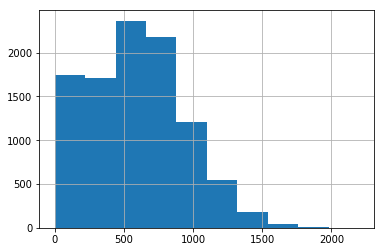

In [82]:
k = pd.Series(h)
k.hist()

**Part C**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in a game that only lasts 25 turns.

In [117]:
turns = 10000
broke = np.zeros(turns)

for i in range(0,10000):
    broke[i] = sim()

    
over = np.count_nonzero(broke == -1)
print("broke" , over)

print ("probability" , over/turns)    

broke 1374
probability 0.1374


**Part D**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in a 25 turn game  _given_ that they went to **Jail** at least twice.  Is a player more or less likely to go bankrupt if they've been to **Jail** twice?  

In [145]:
def beenJail():
    inJail = False
    state = 0
    cash = 200
    jailCount =0
    for i in range(25):
        state,cash = miniopoly_turn(state,cash)
        if state == 30:
            if inJail == False:
                jailCount = jailCount+1
            inJail = True
        else:
            inJail = False
    return jailCount

turnsJ = 10000
jailList = np.zeros(turnsJ)

for i in range(0,10000):
    jailList[i] = beenJail()

jail2 = np.count_nonzero(jailList >=2)
print ("times been to jail twice", jail2)
print ("prob been to jail twice", jail2/10000)
            
        
print ("probability broke given been to jail twice")

times been to jail twice 725
prob been to jail twice 0.0725
probability broke given been to jail twice


P(Broke | Jail2) = $\frac{P(Broke\cap Jail2)}{P(Jail2}$

In [152]:
print("P(Broke | Jail2 )", (((jail2/10000) * (over/10000)) / (jail2/10000)))

P(Broke | Jail2 ) 0.1374


**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that a player has gone to jail at least twice, given that the player went bankrupt in the first 25 turns.

In [153]:
#Estimate probability of going to jail twice, given bankruptcy in first 25 turns.

P(Jail2 | Broke) = $\frac{P(Broke|Jail2) * P(Jail2)}{P(Broke} = 0.0725$

***
<a id='p5'></a>
[Back to top](#top)

### [15 points] Problem 5

To get published in an academic journal, you have to prove something "interesting."  As a result, most academics begin their research by investigating hypotheses that, all else equal, are unlikely to be true.  Suppose each research project begins with a research *claim* that has a 10% chance of being correct.

They then perform a study that satisfies the following two properties:

    1) The probability that they correctly *find* an important result given that their *claim* is true is 50%
    2) The probability that they incorrectly *find* an important result given that their *claim* is false is 5%

If they *find* an important result they are published.  What is the probability that their *claim* was true, given that they were published?

- If they find a result, they found it, no matter if it was correctly found or not. 
- P(Find | True) = 0.5
- P(Find | False) = 0.05.
- P(True | Published) = $\frac{P(Published | True) P(True)}{P(Published)}$
- P(True | Published) = $\frac{0.5 * 0.1}{0.55}$
- P(True | Published) = 0.09